In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.model_selection import (KFold, train_test_split)
from matplotlib import cm
from sklearn.metrics import mean_squared_error as mse
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist


## Importing and Spliting Data

In [2]:
# Import Data
url = 'https://raw.githubusercontent.com/pgardocki3/ME8813ML/master/Project/superconductor.csv'
df = pd.read_csv(url)
#df.drop('Unnamed: 0', inplace=True, axis=1) 

df.head()


# Split data into train/test sets

X = df.iloc[:,0:-2]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)


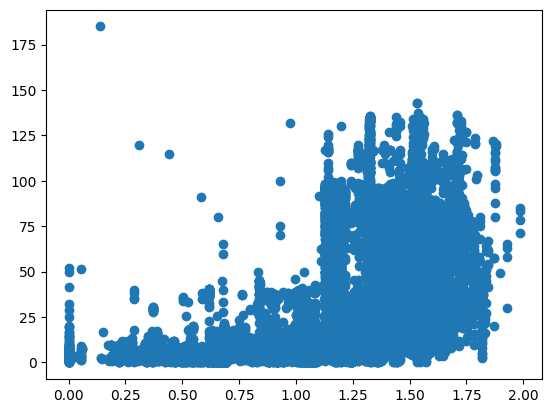

In [3]:
plt.scatter(X_train.iloc[:,5], y_train)
plt.show()

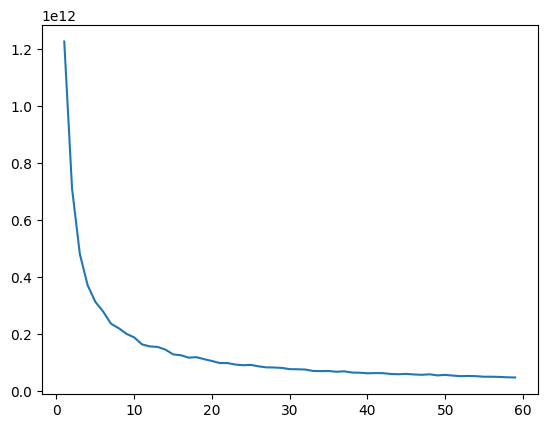

In [4]:
# Choosing the optimal k
k_range = range(1,60)
# Try clustering the data for k values ranging 1 to 10
k_means_var = [KMeans(n_clusters = k, n_init='auto').fit(X_train) for k in k_range]
centroids = [X.cluster_centers_ for X in k_means_var]

k_euclid = [cdist(X_train, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis=1) for ke in k_euclid]

# Calculate within-cluster sum of squares
wcss = [sum(d**2) for d in dist]

# Visualize the elbow method for determining k
plt.plot(k_range, wcss)


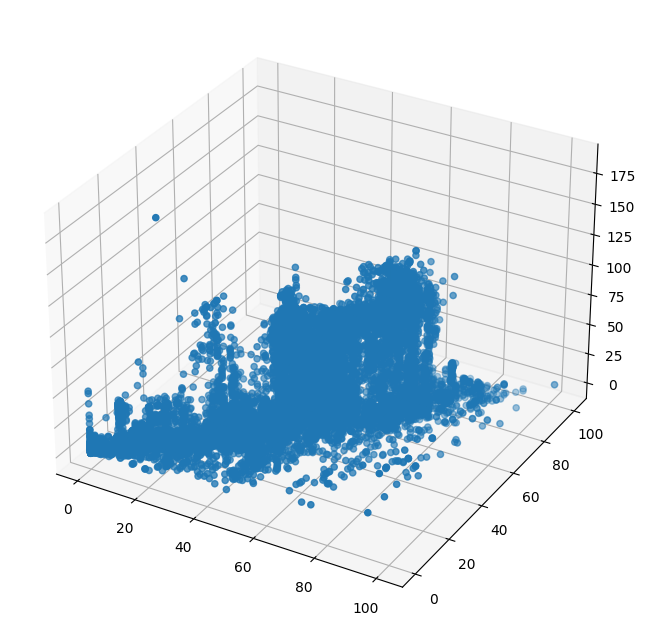

In [7]:
# Plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_train.iloc[:,9],X_train.iloc[:,10],y_train,label='data')
